### Lesson - Statistics and Probability III: Frequency Distribution
    
One way to simplify a large data is to express the variables of interest as frequencies i.e. the number of times they occur with a unique value.   

With the table below, we simplify the `POS` variable by transforming it to a comprehensible format. Instead of having to deal with analyzing 143 values (the length of the `POS` variable), now we only have five values to analyze. Such a table is often called a **frequency distribution table**, or, shorter, **frequency table** or **frequency distribution**.

We can see how the frequencies are distributed:
- Almost half of the players play as guards.
- Most of the players are either guards, forwards or centers.
- Very few players have combined positions (like guard/forward or forward/center).

We can make comparisons with ease:
- There are roughly two times more guards than forwards.
- There are slightly less centers that forwards; etc.

In [1]:
# Setting pandas display options for large data
import pandas as pd

pd.options.display.max_rows = 200
pd.options.display.max_columns = 50

In [2]:
wnba = pd.read_csv("wnba.csv")

In [3]:
print(wnba["Pos"].value_counts())

G      60
F      33
C      25
G/F    13
F/C    12
Name: Pos, dtype: int64


### Frequency Distribution Tables

A frequency distribution table has two columns. One column records the unique values of a variable, and the other the frequency of each unique value. To generate a frequency distribution table using Python, we can use the `Series.value_counts()` [method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html).

In [4]:
freq_distro_height = wnba["Height"].value_counts(normalize = False)
print(freq_distro_height)


188    20
193    18
175    16
185    15
191    11
183    11
173    11
196     9
178     8
180     7
170     6
198     5
201     2
168     2
206     1
165     1
Name: Height, dtype: int64


In [5]:
# Using normalize (%age) and bins (stacks or groups) arguments
freq_distro_height = wnba["Height"].value_counts(normalize = True, bins = 2)
print(freq_distro_height)

(164.958, 185.5]    0.538462
(185.5, 206.0]      0.461538
Name: Height, dtype: float64


### Sorting Frequency Table

Pandas sorts the tables by default in the descending order of the frequencies using default `ascending = False`. Setting it to `True` will sort in ascending order. 

However, if we want to sort by heights and not their values, we will have to use `sort_index` [method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.sort_index.html) in which default argument is `ascending = True`. We can also set it to `False`/

In [6]:
age_ascending = wnba["Age"].value_counts().sort_index(ascending = True)
age_descending = wnba["Age"].value_counts().sort_index(ascending = False)

print(age_ascending, age_descending)

21     2
22    10
23    15
24    16
25    15
26    12
27    13
28    14
29     8
30     9
31     8
32     8
33     3
34     5
35     4
36     1
Name: Age, dtype: int64 36     1
35     4
34     5
33     3
32     8
31     8
30     9
29     8
28    14
27    13
26    12
25    15
24    16
23    15
22    10
21     2
Name: Age, dtype: int64


### Sorting for Ordinal Variables

We can't sort variables measure on ordinal scale using above techniques as the measurement is done using words. 

We can convert variables measured on ratio or interval scales to ordinal scales:

In [7]:
def make_pts_ordinal(row):
    if row['PTS'] <= 20:
        return 'very few points'
    if (20 < row['PTS'] <=  80):
        return 'few points'
    if (80 < row['PTS'] <=  150):
        return 'many, but below average'
    if (150 < row['PTS'] <= 300):
        return 'average number of points'
    if (300 < row['PTS'] <=  450):
        return 'more than average'
    else:
        return 'much more than average'
    
wnba['PTS_ordinal_scale'] = wnba.apply(make_pts_ordinal, axis = 1)



In [8]:
print(wnba[["Name", "PTS", "PTS_ordinal_scale"]][:5])

              Name  PTS         PTS_ordinal_scale
0    Aerial Powers   93   many, but below average
1      Alana Beard  217  average number of points
2     Alex Bentley  218  average number of points
3  Alex Montgomery  188  average number of points
4     Alexis Jones   50                few points


In [9]:
# Frequency Distribution Table

print(wnba['PTS_ordinal_scale'].value_counts())

average number of points    45
few points                  27
many, but below average     25
more than average           21
much more than average      13
very few points             12
Name: PTS_ordinal_scale, dtype: int64


In [10]:
# To sort by index, we have to use index labels in desc or asc order 
# as sort_index will only sort alphabetically 

pts_ordinal_desc = wnba['PTS_ordinal_scale'].value_counts()[['much more than average', 'more than average', 'average number of points', 'many, but below average', 'few points', 'very few points']]
print(pts_ordinal_desc)

much more than average      13
more than average           21
average number of points    45
many, but below average     25
few points                  27
very few points             12
Name: PTS_ordinal_scale, dtype: int64


In [11]:
# Or we can use series.iloc to get same results as above
pts_ordinal_desc = wnba['PTS_ordinal_scale'].value_counts().iloc[[4, 3, 0, 2, 1, 5]]
print(pts_ordinal_desc)

much more than average      13
more than average           21
average number of points    45
many, but below average     25
few points                  27
very few points             12
Name: PTS_ordinal_scale, dtype: int64


### Proportions and Percentages

When we analyze distributions, we're often interested in answering questions about **proportions** and **percentages**.

we may want to answer the following questions about the distribution of the POS (player position) variable:

- What proportion of players are guards?
- What percentage of players are centers?
- What percentage of players have mixed positions?

We can set normalize parameter to `True` in value_counts to get proportions, and multiply with 100 for percentages

In [12]:
# Proportions
age_prop = wnba["Age"].value_counts(normalize = True).sort_index(ascending = True) 
print(age_prop)

21    0.013986
22    0.069930
23    0.104895
24    0.111888
25    0.104895
26    0.083916
27    0.090909
28    0.097902
29    0.055944
30    0.062937
31    0.055944
32    0.055944
33    0.020979
34    0.034965
35    0.027972
36    0.006993
Name: Age, dtype: float64


In [13]:
# Percentages
age_pct = (wnba["Age"].value_counts(normalize = True)*100).sort_index(ascending = True)
print(age_pct)                                                                     

21     1.398601
22     6.993007
23    10.489510
24    11.188811
25    10.489510
26     8.391608
27     9.090909
28     9.790210
29     5.594406
30     6.293706
31     5.594406
32     5.594406
33     2.097902
34     3.496503
35     2.797203
36     0.699301
Name: Age, dtype: float64


In [14]:
# %age of players with age 30 or older
print(sum(age_pct[age_pct.index>=30]))

26.573426573426573


In [15]:
# %age of players with age 23 or younger
print(sum(age_pct[age_pct.index<=23]))

18.88111888111888


### Percentiles and Percentile Rank

The percentage of players aged 23 years or younger is 19% (rounded to the nearest integer). This percentage is also called a **percentile rank**.

A percentile rank of a value in a frequency distribution is given by the percentage of values that are equal or less than x. Above x = 23, and the fact that 23 has a **percentile rank** of 19% means that 19% of the values are equal to or less than 23.

In this context, the value of 23 is called the **19th percentile**. If a value is the 19th percentile, it means that 19% of all the values in the distribution are equal to or less than x.

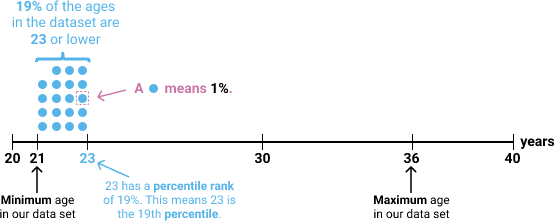

When we're trying to answer questions similar to "What percentage of players are 23 years or younger?", we're trying to find percentile ranks. Above, we calculated it using:
```
# %age of players with age 23 or younger
print(sum(age_pct[age_pct.index<=23]))

18.88111888111888

```
We can use `scipy.stats` to find the percentile directly using percentileofscore `(a, score, kind='weak')` [function](https://docs.scipy.org/doc/scipy-0.10.0/reference/generated/scipy.stats.percentileofscore.html#scipy-stats-percentileofscore).

In [16]:
# kind = 'weak': 
from scipy.stats import percentileofscore
print(percentileofscore(a = wnba['Age'], score = 23, kind = 'weak'))

18.88111888111888


In [17]:
# kind = 'rank': average percentage ranking of score
print(percentileofscore(a = wnba['Age'], score = 23, kind = 'rank'))

13.986013986013987


The question that what percentage of players are 30 years or older can also be answered using percentile ranks. First we need to find the percentage of values equal to or less than 29 years (the percentile rank of 29). The rest of the values must be 30 years or more.

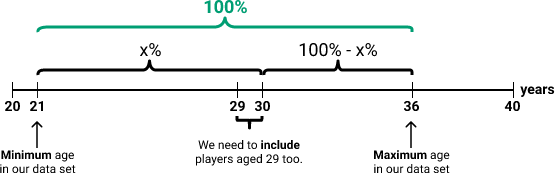

In [18]:
# %age of players with age 30 or older
print(100 - percentileofscore(wnba['Age'], 29, kind = 'weak'))


26.573426573426573


In [19]:
# %age of players playing half the games or less in season (total games = 34)

game_pct = (wnba["Games Played"].value_counts(normalize = True)*100).sort_index(ascending = True)
print(game_pct) 

2      0.699301
4      2.097902
5      0.699301
7      2.097902
8      0.699301
9      0.699301
10     1.398601
12     0.699301
14     2.797203
15     1.398601
16     1.398601
17     1.398601
18     2.097902
19     0.699301
20     2.797203
21     1.398601
22     4.195804
23     4.895105
24     3.496503
25     4.895105
26     4.195804
27     5.594406
28     6.993007
29    20.979021
30    17.482517
31     3.496503
32     0.699301
Name: Games Played, dtype: float64


In [20]:
# Using Python
print(sum(game_pct[game_pct.index<=17]))

16.083916083916083


In [21]:
# using scipy.stat
from scipy.stats import percentileofscore
print(percentileofscore(a = wnba['Games Played'], score = 17, kind = 'weak'))

16.083916083916083


In [22]:
# percentage of players playing more than half the games 

print(100 - percentileofscore(a = wnba['Games Played'], score = 17, kind = 'weak'))

83.91608391608392


### Finding Percentiles with Pandas

`Series.describe()` [method]( , returns by default the 25th, the 50th, and the 75th percentiles. However, the `percentiles` parameter can be set to output any percentile in the format between 0 and 1. The default is [.25, .5, .75], which returns the 25th, 50th, and 75th percentiles.

In [23]:
print(wnba["Age"].describe())

count    143.000000
mean      27.076923
std        3.679170
min       21.000000
25%       24.000000
50%       27.000000
75%       30.000000
max       36.000000
Name: Age, dtype: float64


In [24]:
# Use iloc to get relevant output

print(wnba["Age"].describe().iloc[3:])

min    21.0
25%    24.0
50%    27.0
75%    30.0
max    36.0
Name: Age, dtype: float64


The 25th, 50th, and 75th percentiles pandas returns by default are the scores that divide the distribution into four equal parts. The three percentiles that divide the distribution in four equal parts are also known as **quartiles**.

- The first quartile (also called lower quartile) is 24 (note that 24 is also the 25th percentile).
- The second quartile (also called the middle quartile) is 27 (note that 27 is also the 50th percentile).
- And the third quartile (also called the upper quartile) is 30 (note that 30 is also the 75th percentile).

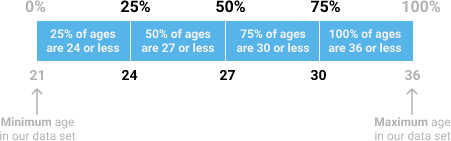

In [25]:
# Upper quartile of "Age"

age_upper_quartile = wnba["Age"].describe().iloc[6]
print(age_upper_quartile)

30.0


In [26]:
# Middle quartile of "Age"

age_middle_quartile = wnba["Age"].describe(percentiles = [0.5])["50%"]
print(age_middle_quartile)

27.0


In [27]:
# 95th percentile of "Age"

age_95th_percentile = wnba["Age"].describe(percentiles = [0.95])["95%"]
print(age_95th_percentile)

34.0


### Group Frequencies

For large variability in values of a variable, we need to group frequencies in order to make data comprehensible. 

For example for the `Weigh` variable, the values range from 55 to 113 kg, which amounts to a difference of 58 kg. We can try to segment this 58 kg interval in ten smaller and equal intervals known as **bins**. This will result in ten intervals of 5.8 kg each.

We can make use of the `bins` parameter of `Series.value_counts(`). If we want ten equal intervals, we need to specify bins = 10

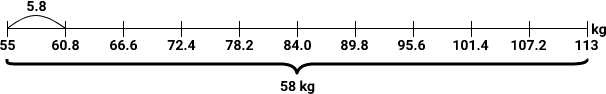

In [28]:
weight_freq = (wnba["Weight"].value_counts(bins=10, normalize=True)).sort_index()
print(weight_freq)

(54.941, 60.8]    0.034965
(60.8, 66.6]      0.146853
(66.6, 72.4]      0.069930
(72.4, 78.2]      0.230769
(78.2, 84.0]      0.216783
(84.0, 89.8]      0.167832
(89.8, 95.6]      0.069930
(95.6, 101.4]     0.020979
(101.4, 107.2]    0.013986
(107.2, 113.0]    0.020979
Name: Weight, dtype: float64


`(54.941, 60.8]`, `(60.8, 66.6]` or `(107.2, 113.0]` are number intervals. The `(` character indicates that the starting point is not included, while the `]` indicates that the endpoint is included. (54.941, 60.8] means that 54.941 isn't included in the interval, while 60.8 is. The interval (54.941, 60.8] contains all real numbers greater than 54.941 and less than or equal to 60.8.

The table we generated above is also known as a **grouped frequency distribution table**. Each group (interval) in a grouped frequency distribution table is also known as a **class interval**. `(107.2, 113.0]`, for instance, is a class interval.

Using the grouped frequency distribution table we generated above for the `Weight` variable, we can find patterns easier in the distribution of values:

- Most players weigh somewhere between 70 and 90 kg.
- Very few players weigh over 100 kg.
- Very few players weigh under 60 kg; etc.



In [29]:
# Frequency table for "PTS"
pts_freq = wnba["PTS"].value_counts().sort_index()
print(pts_freq)


2      1
3      1
6      2
7      1
8      1
9      1
12     1
13     1
17     2
19     1
22     1
24     1
26     2
28     1
31     1
32     1
36     1
41     1
44     1
48     2
49     1
50     1
51     1
54     1
55     1
58     1
65     1
66     1
70     2
72     1
73     1
77     1
78     1
79     1
81     1
87     2
88     1
91     1
93     1
96     3
100    1
102    1
106    2
116    2
119    1
127    1
128    1
134    1
138    1
139    1
140    1
141    1
142    1
148    1
151    1
154    1
156    1
158    1
159    1
161    1
171    1
177    1
185    1
188    1
191    1
199    1
200    1
207    2
209    1
210    1
216    1
217    3
218    1
225    2
228    1
230    1
233    1
235    1
238    1
240    1
244    1
245    2
250    1
252    1
253    1
254    1
255    1
259    1
268    1
273    1
277    2
278    1
298    1
317    2
318    1
329    1
336    1
346    1
349    1
364    2
370    1
375    1
376    1
391    1
395    1
397    1
398    1
399    1
411    1
435    1
442    2
4

In [30]:
# Grouped "PTS" frequency table

grouped_freq_table = (wnba["PTS"].value_counts(bins=10, normalize = True)*100).sort_index(ascending = False)
print(grouped_freq_table)


(525.8, 584.0]     3.496503
(467.6, 525.8]     2.797203
(409.4, 467.6]     5.594406
(351.2, 409.4]     6.993007
(293.0, 351.2]     5.594406
(234.8, 293.0]    11.888112
(176.6, 234.8]    13.986014
(118.4, 176.6]    11.888112
(60.2, 118.4]     16.783217
(1.417, 60.2]     20.979021
Name: PTS, dtype: float64


### Information Loss

When we generate grouped frequency distribution tables, there's an inevitable information loss. 

For example in the first interval below, we can see there are 30 players who scored between 2 and 60 points (2 is the minimum value in our data set, and points in basketball can only be integers). However, because we grouped the values, we lost more granular information like:

- How many players, if any, scored exactly 50 points.
- How many players scored under 10 points.
- How many players scored between 20 and 30 points, etc.

In [31]:
pts_freq_grouped = wnba["PTS"].value_counts(bins=10).sort_index()
print(pts_freq_grouped)

(1.417, 60.2]     30
(60.2, 118.4]     24
(118.4, 176.6]    17
(176.6, 234.8]    20
(234.8, 293.0]    17
(293.0, 351.2]     8
(351.2, 409.4]    10
(409.4, 467.6]     8
(467.6, 525.8]     4
(525.8, 584.0]     5
Name: PTS, dtype: int64


To get back this granular information, we can increase the number of class intervals. However, if we do that, we end up again with a table that's lengthy and very difficult to analyze. On the other side, if we decrease the number of class intervals, we lose even more information.

We can conclude there is a trade-off between the information in a table, and how comprehensible the table is.

When we increase the number of class intervals, we can get more information, but the table becomes harder to analyze. When we decrease the number of class intervals, we get a boost in comprehensibility, but the amount of information in the table decreases.

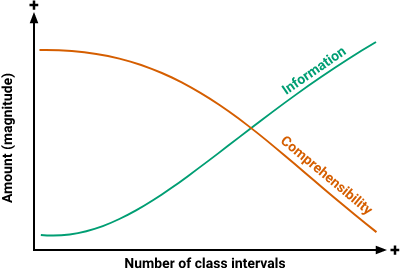

As a rule of thumb, 10 is a good number of class intervals to choose because it offers a good balance between information and comprehensibility. 

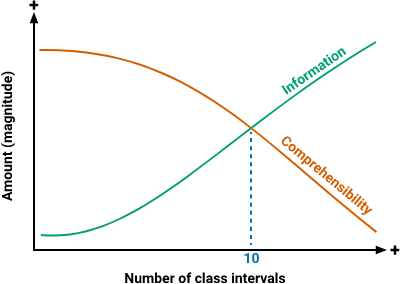

In [32]:
# Grouped frequency table for "MIN" variable (minutes played during the season), Bins = 5

mins_freq_grouped_5 = wnba["MIN"].value_counts(bins=5).sort_index()
print(mins_freq_grouped_5)

(10.993, 213.2]    29
(213.2, 414.4]     32
(414.4, 615.6]     25
(615.6, 816.8]     29
(816.8, 1018.0]    28
Name: MIN, dtype: int64


In [33]:
# Grouped frequency table for "MIN" variable (minutes played during the season), Bins = 10

mins_freq_grouped_10 = wnba["MIN"].value_counts(bins=10).sort_index()
print(mins_freq_grouped_10)

(10.993, 112.6]    19
(112.6, 213.2]     10
(213.2, 313.8]     17
(313.8, 414.4]     15
(414.4, 515.0]     13
(515.0, 615.6]     12
(615.6, 716.2]     15
(716.2, 816.8]     14
(816.8, 917.4]     19
(917.4, 1018.0]     9
Name: MIN, dtype: int64


In [34]:
# Grouped frequency table for "MIN" variable (minutes played during the season), Bins = 20

mins_freq_grouped_20 = wnba["MIN"].value_counts(bins=20).sort_index()
print(mins_freq_grouped_20)

(10.993, 62.3]     12
(62.3, 112.6]       7
(112.6, 162.9]      6
(162.9, 213.2]      4
(213.2, 263.5]     11
(263.5, 313.8]      6
(313.8, 364.1]      6
(364.1, 414.4]      9
(414.4, 464.7]      6
(464.7, 515.0]      7
(515.0, 565.3]      4
(565.3, 615.6]      8
(615.6, 665.9]      7
(665.9, 716.2]      8
(716.2, 766.5]     10
(766.5, 816.8]      4
(816.8, 867.1]     12
(867.1, 917.4]      7
(917.4, 967.7]      7
(967.7, 1018.0]     2
Name: MIN, dtype: int64


### Improving Readability of Grouped Freq Tables

The intervals pandas outputs are confusing at first sight. To fix this, we can define the intervals ourselves. For the table above, we can define six intervals of 100 points each, and then count how many values fit in each interval. 

We start with creating the intervals using the `pd.interval_range()` [function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.interval_range.html). 

In [35]:
intervals = pd.interval_range(start = 0, end = 600, freq = 60)
print(intervals)

IntervalIndex([(0, 60], (60, 120], (120, 180], (180, 240], (240, 300], (300, 360], (360, 420], (420, 480], (480, 540], (540, 600]],
              closed='right',
              dtype='interval[int64]')


We create a new Series using the intervals as indices, and, initially, 0 as values

In [37]:
gr_freq_table_10 = pd.Series([0,0,0,0,0,0,0,0,0,0], index = intervals)
print(gr_freq_table_10)

(0, 60]       0
(60, 120]     0
(120, 180]    0
(180, 240]    0
(240, 300]    0
(300, 360]    0
(360, 420]    0
(420, 480]    0
(480, 540]    0
(540, 600]    0
dtype: int64


now, we loop through the values of the PTS column, and for each value:

- We loop through the intervals we defined previously, and for each interval:
- We check whether the current value from the PTS column belongs to that interval.
- If the value doesn't belong to an interval, we continue the inner loop over the intervals.
If the value belongs to an interval:
- We update the counting for that interval in gr_freq_table by adding 1.
- We exit the inner loop over the intervals with break because a value can belong to one interval only, and it makes no sense to continue the loop (without using break, we'll get the same output but we'll do many redundant iterations)

In [38]:
for value in wnba['PTS']:
    for interval in intervals:
        if value in interval:
            gr_freq_table_10.loc[interval] += 1
            break
print(gr_freq_table_10)

(0, 60]       30
(60, 120]     25
(120, 180]    17
(180, 240]    22
(240, 300]    15
(300, 360]     7
(360, 420]    11
(420, 480]     7
(480, 540]     4
(540, 600]     5
dtype: int64


### Frequency Tables and Continuous Variables

A height of 175 cm is just an interval bounded by the real limits of 174.5 cm (lower real limit) and 175.5 (upper real limit). When we build frequency tables for continuous variables, we need to take into account that the values are intervals.

The height of 175 cm has a frequency of 16 in the distribution of the Height variable:

In [39]:
print(wnba['Height'].value_counts()[175])

16


This doesn't mean that there are 16 players that are all exactly 175 cm tall. It rather means that there are 16 players with a height that's somewhere between 174.5 cm and 175.5 cm.

A similar reasoning applies when we read grouped frequency tables. If we had an interval of (180, 190] for a continuous variable, 180 and 190 are not the real limits. Instead, the real limits are given by the interval (179.5, 190.5], with 179.5 being the lower real limit of 180, and 190.5 the upper real limit of 190.

Continuous variables affect as well the way we read percentiles. For instance, the 50th percentile (middle quartile) in the distribution of the Height variable is 185 cm.

Continuous variables affect as well the way we read percentiles. For instance, the 50th percentile (middle quartile) in the distribution of the Height variable is 185 cm.

This means that 50% of the values are less than or equal to 185.5 cm (the upper limit of 185 cm), not equal to 185 cm.

In [40]:
print(wnba['Height'].describe().iloc[3:])

min    165.0
25%    176.5
50%    185.0
75%    191.0
max    206.0
Name: Height, dtype: float64
